In [5]:
#!/bin/python3
import os
import sys
import glob
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
%matplotlib inline
'''
| Version | Commit
| 0.1     | for single pos_file from imagej 
| 0.2     | for many worm
| 0.2.1   | beautify layout 190323@HF
| 0.3     | Use Jupter as front interface
'''

'\n| Version | Commit\n| 0.1     | for single pos_file from imagej \n| 0.2     | for many worm\n| 0.2.1   | beautify layout 190323@HF\n| 0.3     | Use Jupter as front interface\n'

In [6]:
# Source and result dir
pos_file = '/igem/Results/20190104/0-30-many/'
out_dir = '/igem/Results/20190104/0-30-many/'
pos_list = '/igem/Results/20190104/0-30-many/long_name.path'
timestamp = time.strftime("%m%d%H%M", time.localtime())
dist_out_dir = out_dir + 'dist'+timestamp
traj_out_dir = out_dir + 'traj'+timestamp
if not os.path.isdir(dist_out_dir):
    os.mkdir(dist_out_dir)
    os.mkdir(traj_out_dir)
    #os.mkdir()

In [7]:
# Load experiment data

pos_dat = None # numpy array [ worm[ time[ yx]]]
img_name = None
done = 0
if pos_list != '':
    data_list = []
    with open(pos_list, "r") as f:
        line = f.readline()
        while line:
            data_list.append(np.loadtxt(pos_file+line.strip(), delimiter='\t',
                skiprows=1, usecols=[2,3]))
            if done == 0:
                with open(pos_file+line.strip(), 'r') as name:
                    img_name = [line.strip().split('\t')[4] for line in name]
                done = 1
            line = f.readline()
    pos_dat = np.asarray(data_list, dtype=np.int16)
else:
    pos_dat = np.loadtxt(pos_file,delimiter=',', skiprows=1)

# Scale and recenter trajactory
scale = 12.5/3510
shift = 3510/2
fps = 2.5
t0 = 77 # second

w_total, t_total = pos_dat.shape[0:-1]
pos_dat = (pos_dat - shift) * scale
t_label = np.linspace(t_total-1, 0 , t_total) / fps + t0

lim = 6.5 # 6cm


In [56]:
# Calculate the mean in horitional and vertical
mean_t = np.zeros([2, t_total]) 

#pos_dat = pos_dat - pos_dat[:, 0, :]

for t_i in range(0, t_total):
    mean_t[0][t_i] = np.mean(pos_dat[:, t_i, 1] - pos_dat[:, -1, 1]) # x 
    mean_t[1][t_i] = np.mean(pos_dat[:, t_i, 0] - pos_dat[:, -1, 0]) # y
    

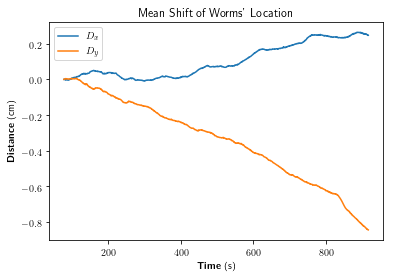

In [57]:
plt.figure(2)
plt.rc('text', usetex=True)

plt.plot(t_label, mean_t[0], label=r'\textit{$D_x$}')
plt.plot(t_label, mean_t[1], label=r'\textit{$D_y$}')
plt.ylabel(r'\textbf{Distance} (cm)')
plt.xlabel(r'\textbf{Time} (s)')
plt.legend()
plt.title("Mean Shift of Worms' Location")
plt.savefig(out_dir+'/MeanShit.png', dpi=200)

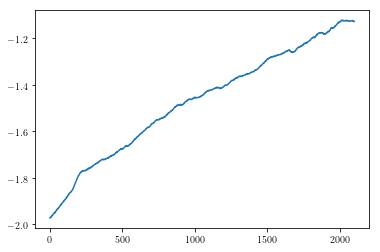

Plot move distance move from start point

In [ ]:
# Plot Scatter and Histgram

nullfmt = NullFormatter()         # no labels
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]
# start with a rectangular Figure
plt.figure(1, figsize=(8, 8))
plt.rc('text', usetex=True)
axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

binwidth = 0.5
bins = np.arange(-lim, lim + binwidth, binwidth)

for t_i in range(t_total-1, 0, -1):
    y = pos_dat[:,t_i,0]
    x = pos_dat[:,t_i,1]

    # the scatter plot:
    #axScatter = plt.axes(rect_scatter)
    plt.sca(axScatter)
    plt.cla()#
    axScatter.text(0, 6, r'M9 Buffer')
    axScatter.text(0, -6, r' Enthoal')
    axScatter.spines['right'].set_visible(False)
    axScatter.spines['top'].set_visible(False)
    axScatter.xaxis.set_ticks_position('bottom')
    axScatter.yaxis.set_ticks_position('left')
    axScatter.scatter(x, y, c ='b', marker = '+')
    axScatter.set_xlabel(r'$D_x$ (cm)')
    axScatter.set_ylabel(r'$D_y$ (cm)')
    #xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    axScatter.set_xlim((-lim, lim))
    axScatter.set_ylim((-lim, lim))


    #axHistx = plt.axes(rect_histx)
    plt.sca(axHistx)
    plt.cla()
    axHistx.spines['right'].set_visible(False)
    axHistx.spines['top'].set_visible(False)
    axHistx.yaxis.set_ticks_position('left')
    axHistx.xaxis.set_ticks_position('bottom')
    axHistx.hist(x, bins=bins, color = 'b')
    axHistx.set_xlim(axScatter.get_xlim())
    axHistx.set_ylim((0, 40))
    #axHisty = plt.axes(rect_histy)
    plt.sca(axHisty)
    plt.cla()
    axHisty.spines['right'].set_visible(False)
    axHisty.spines['top'].set_visible(False)
    axHisty.yaxis.set_ticks_position('left')
    axHisty.xaxis.set_ticks_position('bottom')
    axHisty.hist(y, bins=bins, orientation='horizontal', color = 'b')
    axHisty.set_ylim(axScatter.get_ylim())
    axHisty.set_xlim((0, 40))

    # no labels
    axHistx.xaxis.set_major_formatter(nullfmt)
    axHisty.yaxis.set_major_formatter(nullfmt)

    plt.title(r'Distribution of trained 0810 Worm, after '+'%0.1fs'%
            ((t_total-t_i)/fps+77), y=-0.15, x=-1.8)
    plt.text(7.5, 7.5, r'$\textbf{N}=$%d'%w_total, fontsize = 12)
    plt.savefig(dist_out_dir +'/'+img_name[t_i] + '.png')#, dpi=100)
    #plt.show()
    print(t_i)


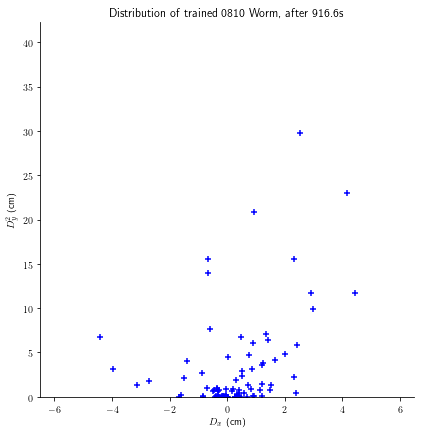

In [23]:
# Plot Scatter of D_y ^2 between D_x

nullfmt = NullFormatter()         # no labels
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
# start with a rectangular Figure
plt.figure(1, figsize=(8, 8))
plt.rc('text', usetex=True)
axScatter = plt.axes(rect_scatter)


for t_i in range(t_total-1, 0, -1):
    y = pos_dat[:,t_i,0] - pos_dat[:, -1, 0]
    x = pos_dat[:,t_i,1] - pos_dat[:, -1, 1]

    # the scatter plot:
    plt.cla()#
    axScatter.spines['right'].set_visible(False)
    axScatter.spines['top'].set_visible(False)
    axScatter.xaxis.set_ticks_position('bottom')
    axScatter.yaxis.set_ticks_position('left')
    axScatter.scatter(x, y*y, c='b', marker = '+')
    axScatter.set_xlabel(r'$D_x$ (cm)')
    axScatter.set_ylabel(r'$D_y^2$ (cm^2)')
    axScatter.set_xlim((-lim, lim))
    axScatter.set_ylim((0, *36))

    plt.title(r'Distribution of trained 0810 Worm, after '+'%0.1fs'%((t_total-t_i)/fps+77))
    #plt.text(7.5, 7.5, r'$\textbf{N}=$%d'%w_total, fontsize = 12)
    plt.savefig(traj_out_dir +'/'+img_name[t_i] + '.png')#, dpi=100)
    #plt.show()
    #print(t_i)

In [ ]:
print(pos_dat)